In [1]:
%ls

'2,3peak mix.ipynb'                    center.csv
'5peak 3 para when it worksss.ipynb'   graph.csv
'Fitting_with_noise (1).ipynb'         labels.png
 ITO_O1s_bg.txt                        model.png
 ITO_O1s_exp.txt                       model_shapes.png
 ITO_O1s_fitting.txt                   peak_number.csv
 ITO_O1s_p1.txt                        width.csv
 ITO_O1s_p2.txt                       '논문 수정.ipynb'
 ITO_O1s_p3.txt                       '데이터 얻기.ipynb'
 P3HT_S2p_bg.txt                      '저장된 데이터로 학습하기.ipynb'
 P3HT_S2p_exp.txt                     '저장된 데이터로 학습하기10.ipynb'
 P3HT_S2p_fitting.txt                 '저장된 데이터로 학습하기11.ipynb'
 P3HT_S2p_p1.txt                      '저장된 데이터로 학습하기12.ipynb'
 P3HT_S2p_p2.txt                      '저장된 데이터로 학습하기2.ipynb'
 PeakDetection.ipynb                  '저장된 데이터로 학습하기3.ipynb'
 Untitled.ipynb                       '저장된 데이터로 학습하기4.ipynb'
 Untitled1.ipynb                      '저장된 데이터로 학습하기5.ipynb'
 Untitled2.ipynb                      '저장된 데이터로

In [2]:
import pandas as pd
import numpy as np

In [3]:
graph = pd.read_csv('graph.csv').values[:,1:]
center= pd.read_csv('center.csv').values[:,1:]
width= pd.read_csv('width.csv').values[:,1:]
amp= pd.read_csv('amp.csv').values[:,1:]
peak_number= pd.read_csv('peak_number.csv').values[:,1:]

In [4]:
peak_number=peak_number.reshape(2000000,)

In [5]:
print(center[0:10])
print(width[0:10])
print(amp[0:10])
print(peak_number[0:10])
print(center.shape)
print(width.shape)
print(amp.shape)
print(peak_number.shape)
print(graph.shape)
print(graph)

[[ 0.          6.08688456 11.0810396 ]
 [ 5.07493349  8.25999368 11.36195096]
 [ 0.          2.67516221 10.60419171]
 [ 0.          5.54053864 12.23836258]
 [ 0.          4.08422309  7.21849474]
 [ 0.          7.30192691 12.34014272]
 [ 0.          2.54016398  5.16493207]
 [ 0.          4.67819908  6.09299318]
 [ 4.90655934  5.13202252 10.34134357]
 [ 0.          5.36008602  5.98285268]]
[[0.         1.24062404 0.95374601]
 [0.60456503 0.35785198 1.1738216 ]
 [0.         1.17339162 1.12952083]
 [0.         0.81456259 0.81987822]
 [0.         0.81681444 1.70560007]
 [0.         0.32207246 0.75414831]
 [0.         0.30486538 1.895045  ]
 [0.         0.59293989 0.4647601 ]
 [1.46428848 1.12931752 1.8841104 ]
 [0.         1.00584571 1.33599321]]
[[0.         0.21158879 0.18180892]
 [0.11125957 0.85593768 0.31159992]
 [0.         0.59012228 0.71652582]
 [0.         1.00856931 0.70388527]
 [0.         0.94976759 0.16667863]
 [0.         0.43501787 0.93207997]
 [0.         0.8393851  0.570734

In [6]:
import matplotlib.pyplot as plt
x = np.linspace(0, 15, 401) 
def y(a,b,c,x):
    beta = 5.09791537e-01
    gamma = 4.41140472e-01
    y = c * ( (0.7*np.exp(-np.log(2)*(x - a)**2 / (beta * b)**2)) + (0.3/(1 + (x - a)**2 / (gamma * b)**2)))
#     y = c*(b**2)/((x-a)**2+b**2)
    return y

<ipython-input-6-69a298250a73>:6: RuntimeWarning: divide by zero encountered in true_divide
  y = c * ( (0.7*np.exp(-np.log(2)*(x - a)**2 / (beta * b)**2)) + (0.3/(1 + (x - a)**2 / (gamma * b)**2)))
<ipython-input-6-69a298250a73>:6: RuntimeWarning: invalid value encountered in true_divide
  y = c * ( (0.7*np.exp(-np.log(2)*(x - a)**2 / (beta * b)**2)) + (0.3/(1 + (x - a)**2 / (gamma * b)**2)))
<ipython-input-6-69a298250a73>:6: RuntimeWarning: divide by zero encountered in true_divide
  y = c * ( (0.7*np.exp(-np.log(2)*(x - a)**2 / (beta * b)**2)) + (0.3/(1 + (x - a)**2 / (gamma * b)**2)))
<ipython-input-6-69a298250a73>:6: RuntimeWarning: invalid value encountered in true_divide
  y = c * ( (0.7*np.exp(-np.log(2)*(x - a)**2 / (beta * b)**2)) + (0.3/(1 + (x - a)**2 / (gamma * b)**2)))
<ipython-input-6-69a298250a73>:6: RuntimeWarning: divide by zero encountered in true_divide
  y = c * ( (0.7*np.exp(-np.log(2)*(x - a)**2 / (beta * b)**2)) + (0.3/(1 + (x - a)**2 / (gamma * b)**2)))
<ipytho

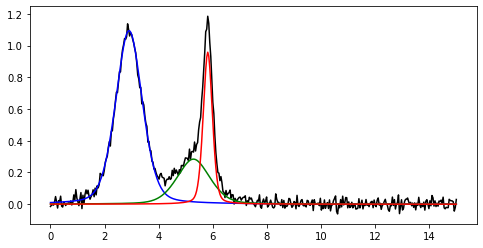

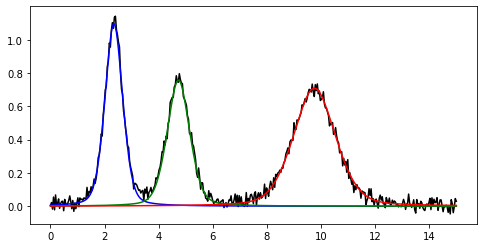

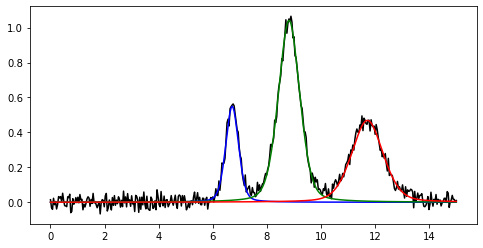

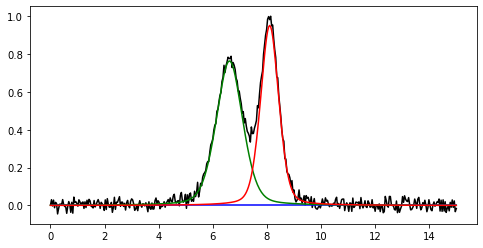

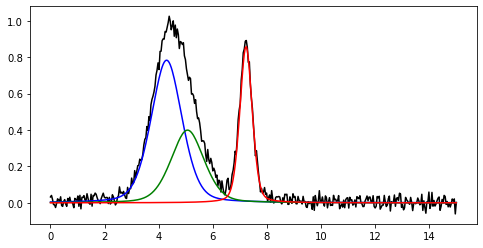

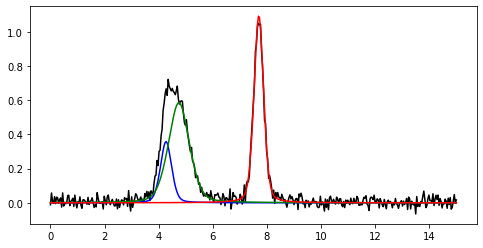

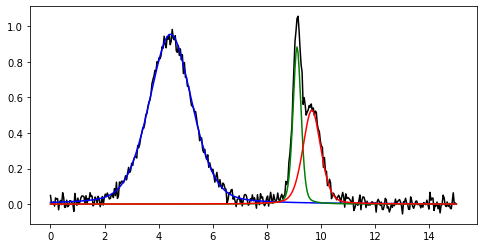

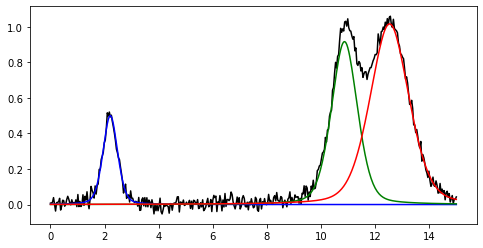

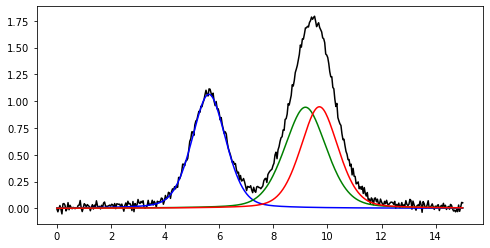

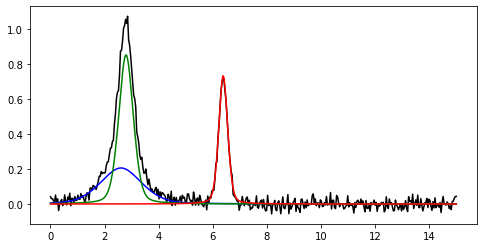

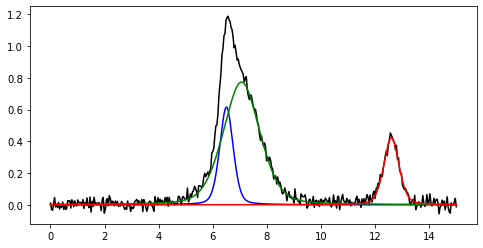

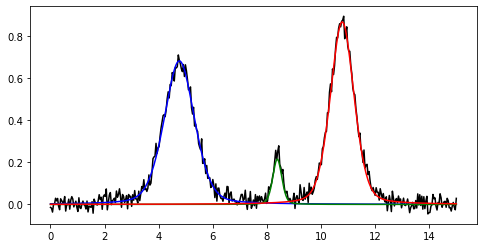

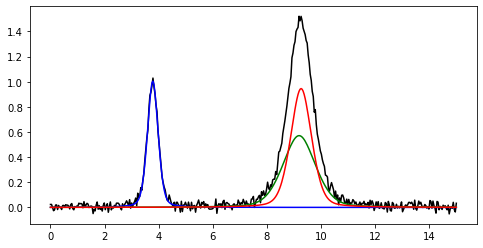

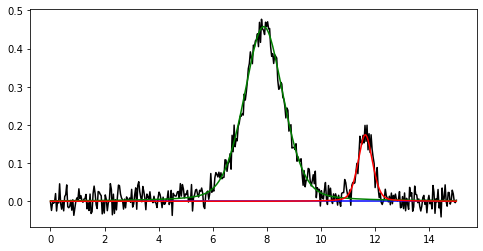

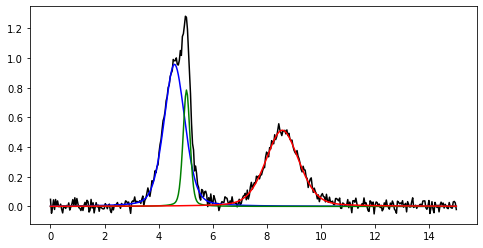

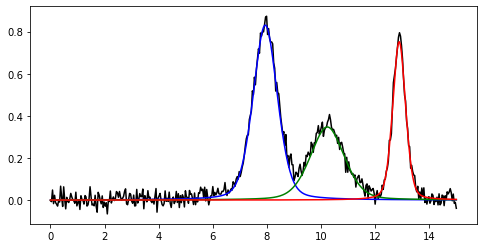

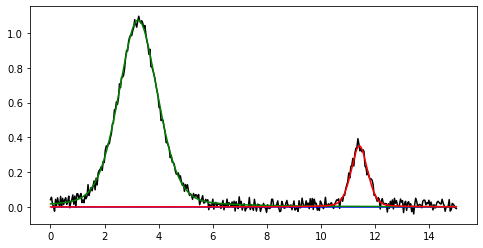

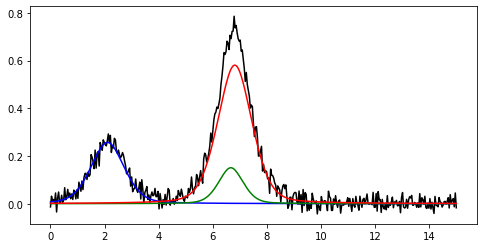

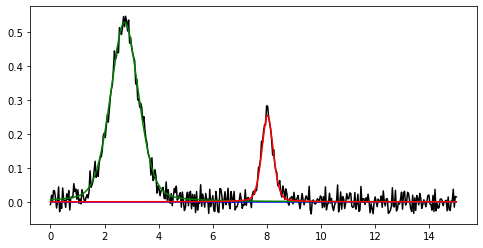

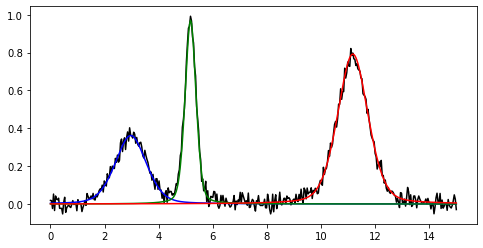

In [7]:
for i in range(20,40):
    plt.figure(figsize = (8,4))
    plt.plot(x,graph[i],color = 'black')
    plt.plot(x,y(center[i][0],width[i][0],amp[i][0],x), color = 'blue')
    plt.plot(x,y(center[i][1],width[i][1],amp[i][1],x), color= 'green')
    plt.plot(x,y(center[i][2],width[i][2],amp[i][2],x), color='red')

In [8]:
#90:9:1
data_number=1000000

train_graph = graph[:int(0.9*2*data_number)]
val_graph = graph[int(0.9*2*data_number):int(0.99*2*data_number)]
test_graph = graph[int(0.99*2*data_number):]

train_center = center[:int(0.9*2*data_number)]
val_center = center[int(0.9*2*data_number):int(0.99*2*data_number)]
test_center = center[int(0.99*2*data_number):]

train_width = width[:int(0.9*2*data_number)]
val_width = width[int(0.9*2*data_number):int(0.99*2*data_number)]
test_width = width[int(0.99*2*data_number):]

train_amp = amp[:int(0.9*2*data_number)]
val_amp = amp[int(0.9*2*data_number):int(0.99*2*data_number)]
test_amp = amp[int(0.99*2*data_number):]

train_peak_number = peak_number[:int(0.9*2*data_number)]
val_peak_number = peak_number[int(0.9*2*data_number):int(0.99*2*data_number)]
test_peak_number = peak_number[int(0.99*2*data_number):]

In [9]:
print(train_graph.shape, val_graph.shape, test_graph.shape)
print(train_center.shape, val_center.shape, test_center.shape)
print(train_width.shape, val_width.shape, test_width.shape)
print(train_amp.shape, val_amp.shape, test_amp.shape)
print(train_peak_number.shape, val_peak_number.shape, test_peak_number.shape)

(1800000, 401) (180000, 401) (20000, 401)
(1800000, 3) (180000, 3) (20000, 3)
(1800000, 3) (180000, 3) (20000, 3)
(1800000, 3) (180000, 3) (20000, 3)
(1800000,) (180000,) (20000,)


In [10]:
# conv1d 쓰기 위해 reshape 사용 
# 1차원 그래프 변환

train_graph = train_graph.reshape(train_graph.shape[0],train_graph.shape[1],1)
val_graph = val_graph.reshape(val_graph.shape[0],val_graph.shape[1],1)
test_graph = test_graph.reshape(test_graph.shape[0],test_graph.shape[1],1)

print(train_graph.shape)
print(val_graph.shape)
print(test_graph.shape)

(1800000, 401, 1)
(180000, 401, 1)
(20000, 401, 1)


In [11]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten, BatchNormalization
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPooling1D, GlobalMaxPooling1D
from keras.layers.merge import concatenate
from keras import layers

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 401, 1)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 61, 32)       3232        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 30, 32)       0           conv1d[0][0]                     
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 27, 64)       8256        max_pooling1d[0][0]              
______________________________________________________________________________________________

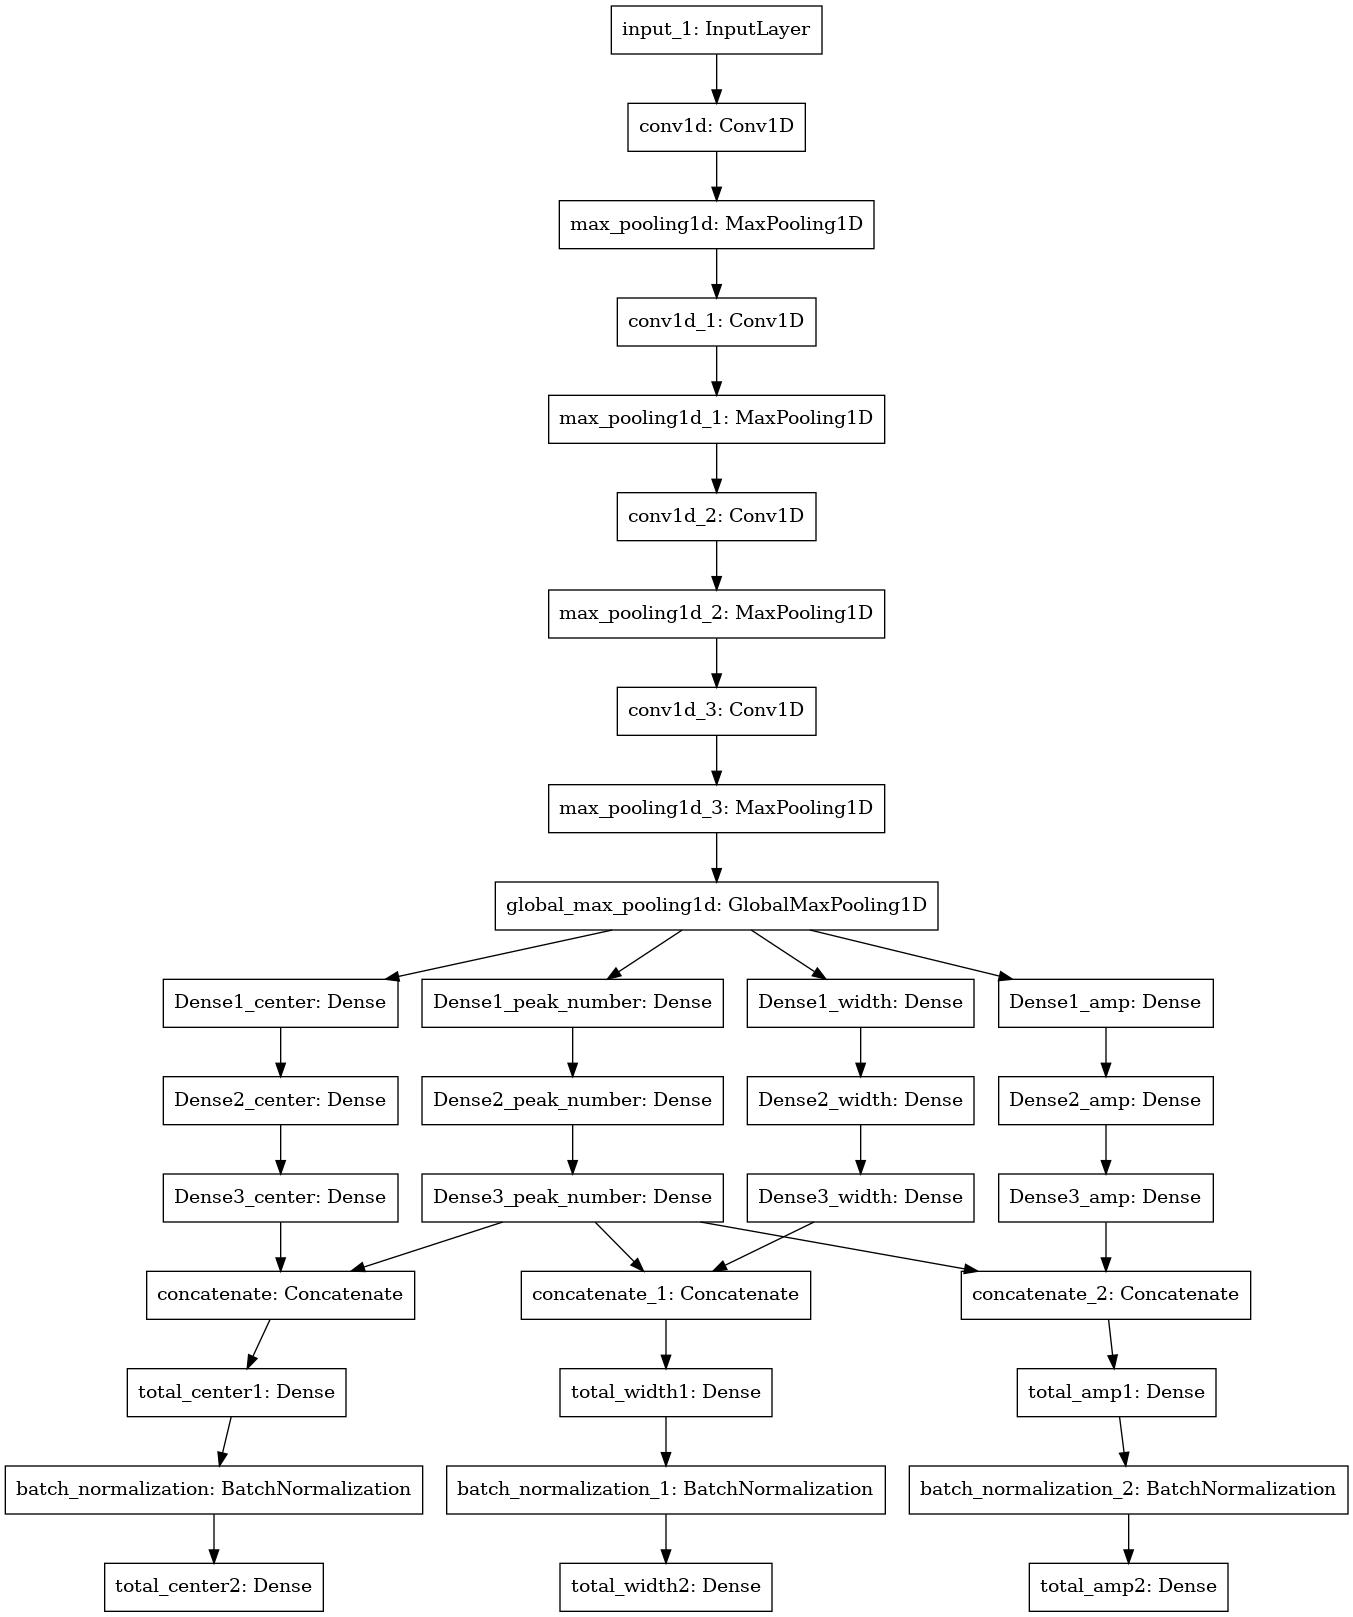

In [12]:

input_data = Input(shape = (len(x), 1))

t = layers.Conv1D(32,100,strides=5,activation = 'relu')(input_data)
t = layers.MaxPooling1D(2)(t)
t = layers.Conv1D(64,4,activation = 'relu')(t)
t = layers.MaxPooling1D(2)(t)
t = layers.Conv1D(128,4,activation = 'relu')(t)
t = layers.MaxPooling1D(2)(t)
t = layers.Conv1D(192,2,activation = 'relu')(t)
t = layers.MaxPooling1D(2)(t)

t = layers.GlobalMaxPooling1D()(t)


Dense1_peak_number = Dense(200, activation = 'relu',name='Dense1_peak_number')(t)
Dense2_peak_number = Dense(200, activation = 'relu',name = 'Dense2_peak_number')(Dense1_peak_number)
Dense3_peak_number = Dense(1, activation = 'linear',name = 'Dense3_peak_number')(Dense2_peak_number)


Dense1_center = Dense(200, activation = 'relu',name='Dense1_center')(t)
Dense2_center = Dense(100, activation = 'relu',name='Dense2_center')(Dense1_center)
Dense3_center = Dense(40, activation = 'relu',name='Dense3_center')(Dense2_center)
# output_center = Dense(3, activation = 'linear',name='output_center')(Dense3_center)

Dense1_width = Dense(200,activation = 'relu',name='Dense1_width')(t)
Dense2_width = Dense(100,activation = 'relu',name='Dense2_width')(Dense1_width)
Dense3_width = Dense(40,activation = 'relu',name='Dense3_width')(Dense2_width)
# output_width = Dense(3,activation = 'linear',name='output_width')(Dense3_width)

Dense1_amp = Dense(200,activation = 'relu',name='Dense1_amp')(t)
Dense2_amp = Dense(100,activation = 'relu',name='Dense2_amp')(Dense1_amp)
Dense3_amp = Dense(40,activation = 'relu',name='Dense3_amp')(Dense2_amp)
# output_amp = Dense(3,activation = 'linear',name='output_amp')(Dense3_amp)

center_merge = concatenate([Dense3_peak_number,Dense3_center])
total_center1 = Dense(40, activation = 'relu',name = 'total_center1')(center_merge)
center_Batchnormalization  = BatchNormalization()(total_center1)
# total_center2 = Dense(40, activation = 'relu',name = 'total_center2')(total_center1)
total_center2 = Dense(3, activation = 'linear',name = 'total_center2')(center_Batchnormalization)


width_merge = concatenate([Dense3_peak_number,Dense3_width])
total_width1 = Dense(40, activation = 'relu',name = 'total_width1')(width_merge)
width_Batchnormalization  = BatchNormalization()(total_width1)
# total_width2 = Dense(40, activation = 'relu',name = 'total_width2')(total_width1)
total_width2= Dense(3, activation = 'linear',name = 'total_width2')(width_Batchnormalization)


amp_merge = concatenate([Dense3_peak_number,Dense3_amp])
total_amp1 = Dense(40, activation = 'relu',name = 'total_amp1')(amp_merge)
amp_Batchnormalization  = BatchNormalization()(total_amp1)
# total_amp2 = Dense(40, activation = 'relu',name = 'total_amp2')(total_amp1)
total_amp2 = Dense(3, activation = 'linear',name = 'total_amp2')(amp_Batchnormalization)


model = Model(inputs = input_data,
              outputs = [Dense3_peak_number,total_center2,total_width2,total_amp2])
print(model.summary())
plot_model(model)

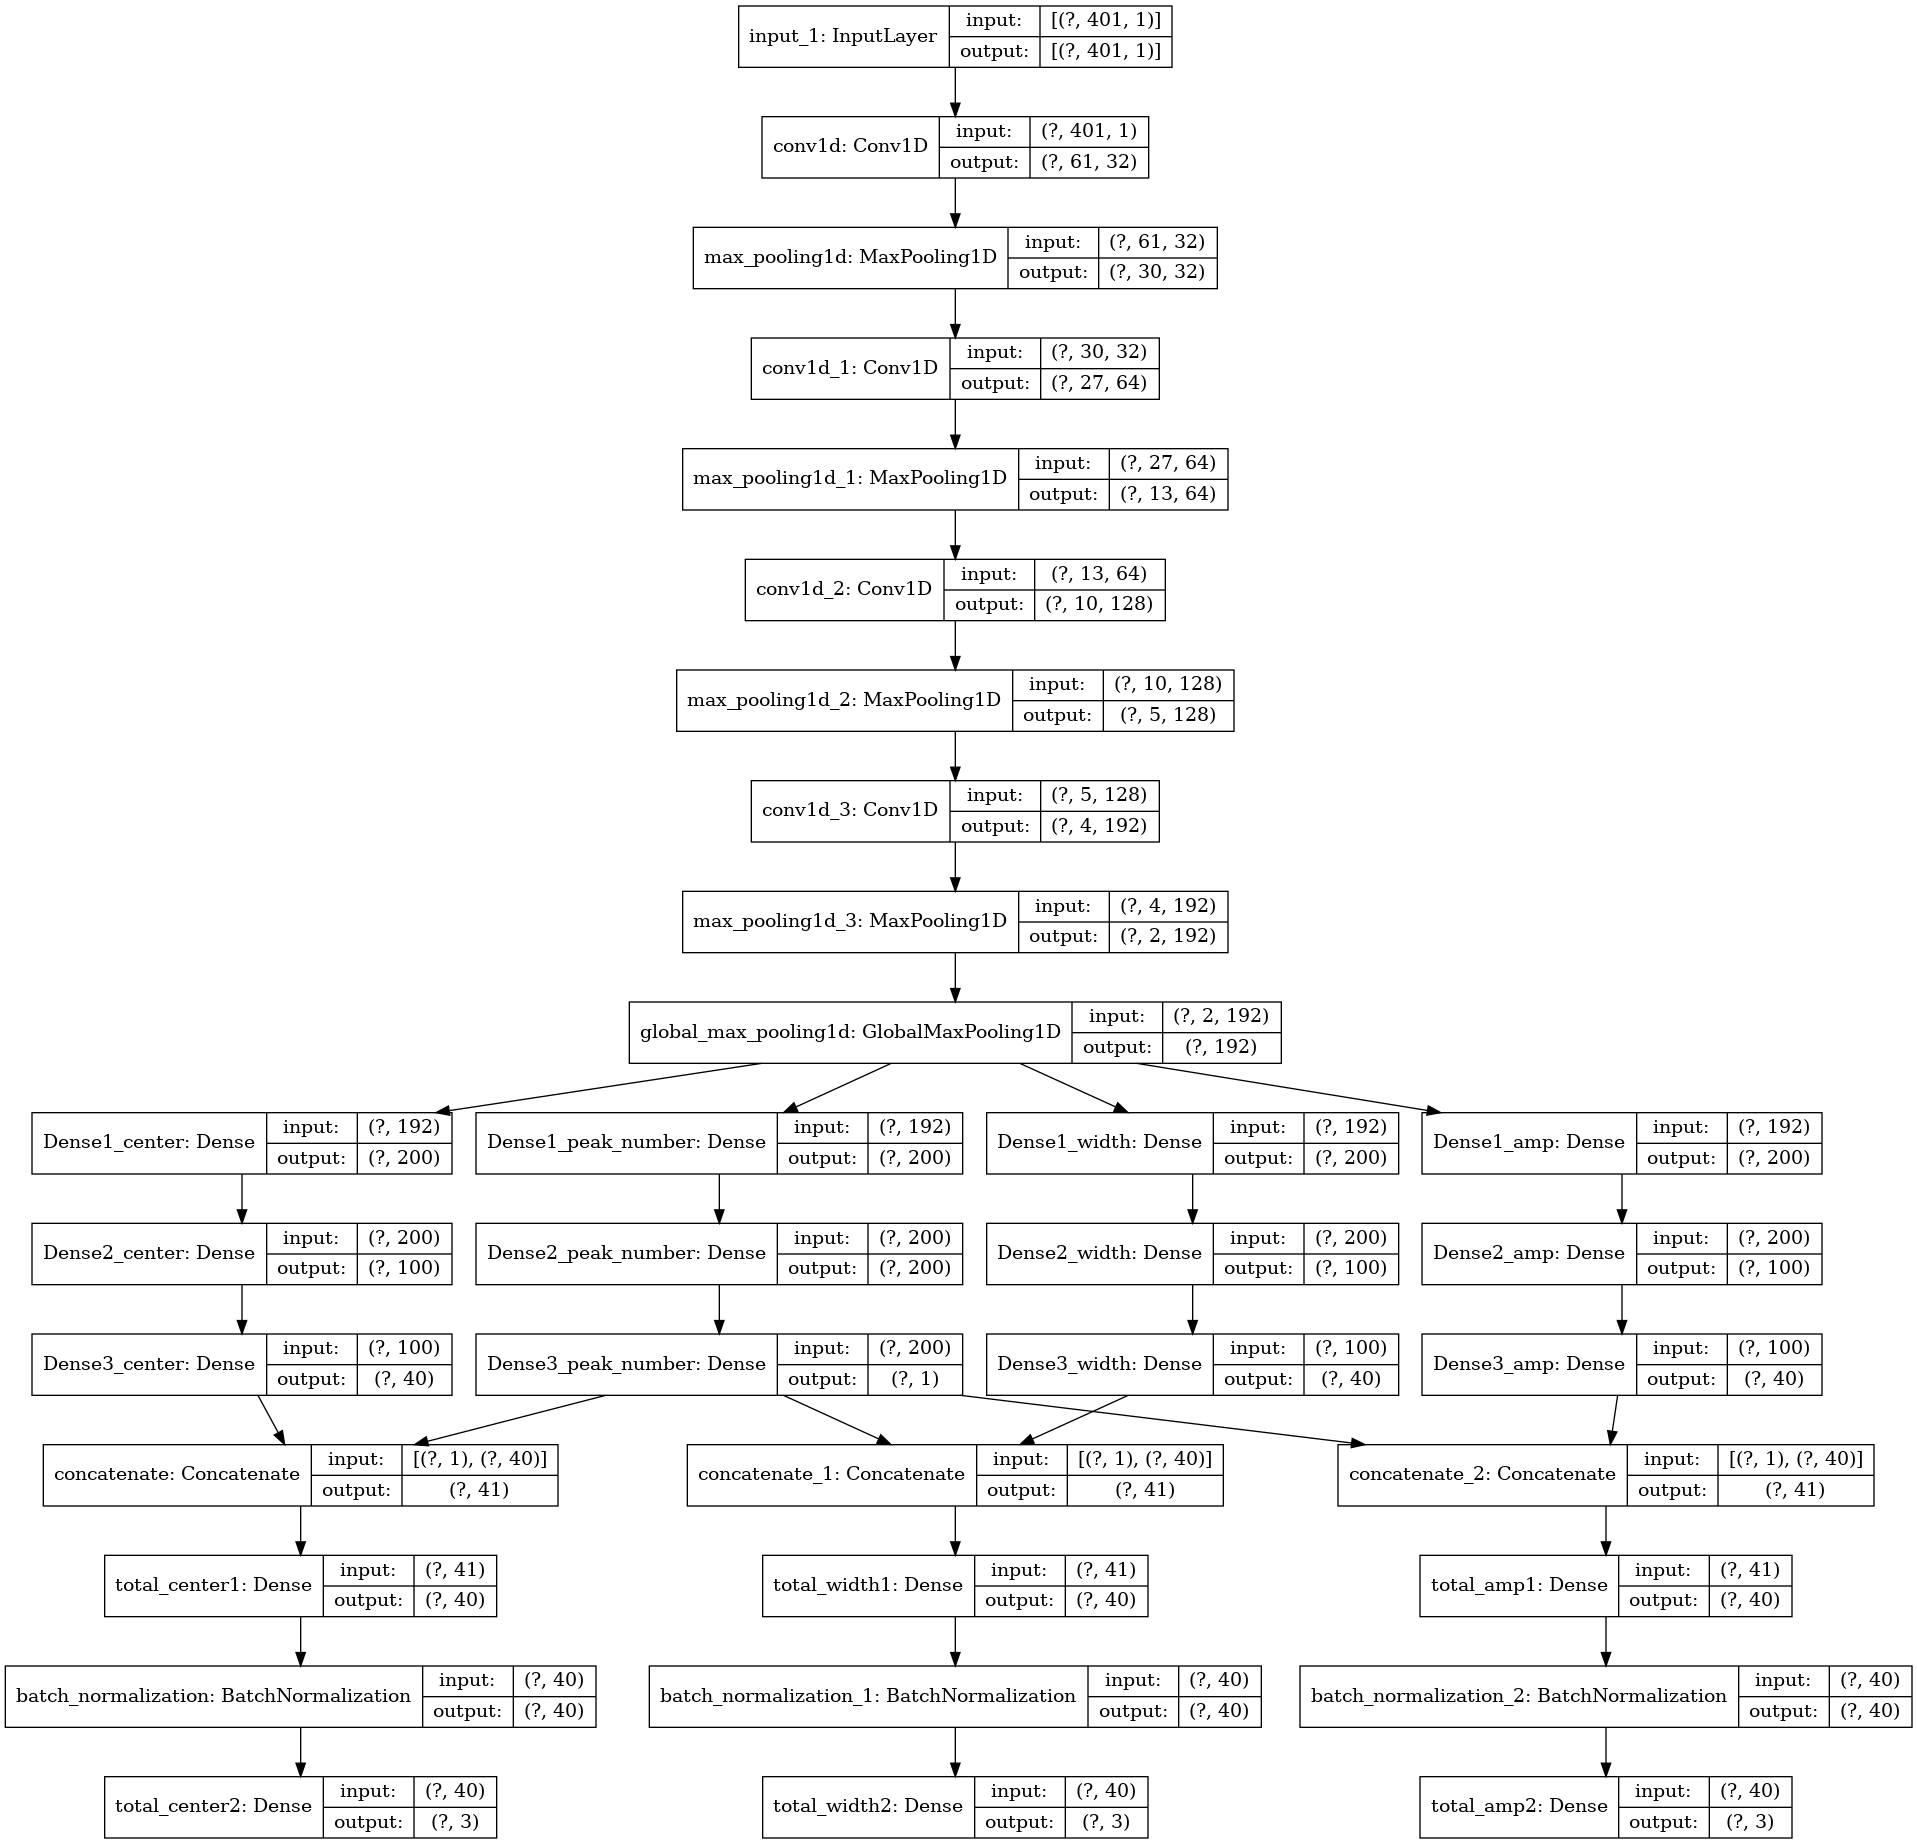

In [13]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file = 'labels.png')
plot_model(model, to_file='model_shapes.png', show_shapes=True)

In [14]:
model.compile(optimizer='adam',
              loss = {'total_center2' : 'mse',
                      'total_width2' : 'mse',
                      'total_amp2' : 'mse',
                      'Dense3_peak_number' : 'mse'},
#               loss_weights={'total_center3' : 0.5,
#                            'total_width3' : 1,
#                            'total_amp3' : 1,
#                             'Dense3_peak_number' :1 },
              metrics = ['mae'])

In [15]:
models=model.fit(train_graph, [train_peak_number,train_center , train_width, train_amp],
          epochs = 50,
          batch_size = 1000,
          validation_data = (val_graph, [val_peak_number, val_center, val_width, val_amp]))

Epoch 1/50
1800/1800 [==============================] - 23s 13ms/step - loss: 5.5050 - Dense3_peak_number_loss: 0.1111 - total_center2_loss: 5.2475 - total_width2_loss: 0.1078 - total_amp2_loss: 0.0386 - Dense3_peak_number_mae: 0.2368 - total_center2_mae: 1.1527 - total_width2_mae: 0.2220 - total_amp2_mae: 0.1387 - val_loss: 0.4423 - val_Dense3_peak_number_loss: 0.0330 - val_total_center2_loss: 0.3219 - val_total_width2_loss: 0.0602 - val_total_amp2_loss: 0.0273 - val_Dense3_peak_number_mae: 0.1292 - val_total_center2_mae: 0.3128 - val_total_width2_mae: 0.1775 - val_total_amp2_mae: 0.1178
Epoch 2/50
1800/1800 [==============================] - 23s 13ms/step - loss: 0.3831 - Dense3_peak_number_loss: 0.0244 - total_center2_loss: 0.2991 - total_width2_loss: 0.0405 - total_amp2_loss: 0.0191 - Dense3_peak_number_mae: 0.0971 - total_center2_mae: 0.2941 - total_width2_mae: 0.1346 - total_amp2_mae: 0.0933 - val_loss: 0.3345 - val_Dense3_peak_number_loss: 0.0125 - val_total_center2_loss: 0.2529

In [16]:
test_graph.shape

(20000, 401, 1)

In [17]:
for key in models.history.keys():
    print(key)

loss
Dense3_peak_number_loss
total_center2_loss
total_width2_loss
total_amp2_loss
Dense3_peak_number_mae
total_center2_mae
total_width2_mae
total_amp2_mae
val_loss
val_Dense3_peak_number_loss
val_total_center2_loss
val_total_width2_loss
val_total_amp2_loss
val_Dense3_peak_number_mae
val_total_center2_mae
val_total_width2_mae
val_total_amp2_mae


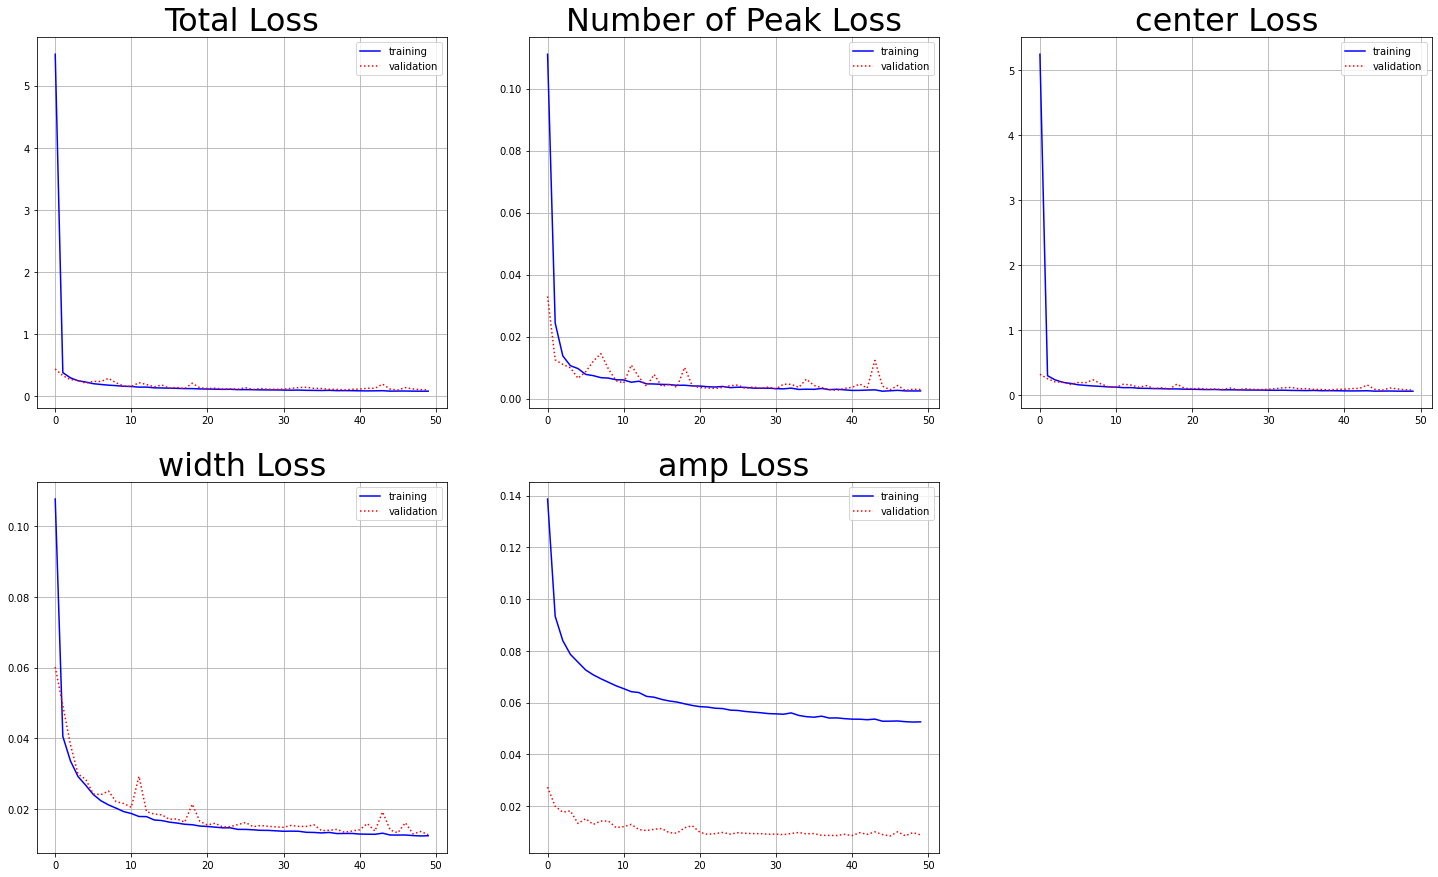

In [18]:
plt.figure(figsize = (25, 15))

plt.subplot(231)
plt.plot(models.history['loss'], 'b-', label = 'training')
plt.plot(models.history['val_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Total Loss", size = 32)
plt.legend()


plt.subplot(232)
plt.plot(models.history['Dense3_peak_number_loss'], 'b-', label = 'training')
plt.plot(models.history['val_Dense3_peak_number_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Number of Peak Loss", size = 32)
plt.legend()

plt.subplot(233)
plt.plot(models.history['total_center2_loss'], 'b-', label = 'training')
plt.plot(models.history['val_total_center2_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("center Loss", size = 32)
plt.legend()

plt.subplot(234)
plt.plot(models.history['total_width2_loss'], 'b-', label = 'training')
plt.plot(models.history['val_total_width2_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("width Loss", size = 32)
plt.legend()

plt.subplot(235)
plt.plot(models.history['total_amp2_mae'], 'b-', label = 'training')
plt.plot(models.history['val_total_amp2_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("amp Loss", size = 32)
plt.legend()


In [19]:
prediction = model.predict(test_graph)
print(len(prediction))

4


In [20]:
print(prediction[0].shape)
print(prediction[1].shape)# if center
print(prediction[2].shape)# width
print(prediction[3].shape)# amp

(20000, 1)
(20000, 3)
(20000, 3)
(20000, 3)


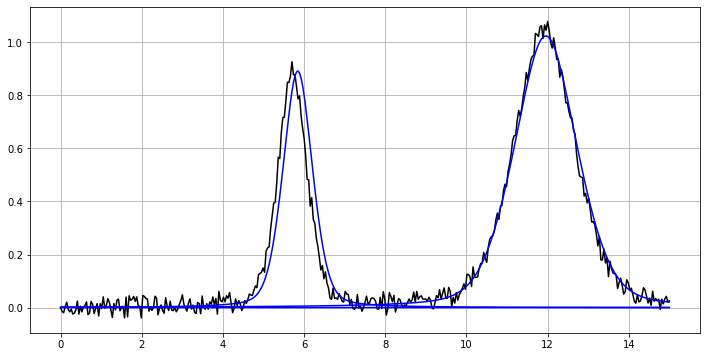

real_center   [ 0.          5.71315308 11.91923309]
predict_center [ 0.06500802 5.8429546 11.954848 ]
---------------
real_width    [0.         0.84337558 1.79121459]
predict_center [ 0.0056625903 0.8586925 1.8400992 ]
---------------
real_amp      [0.         0.88023975 1.04841723]
predict_center [ -0.010537326 0.89229953 1.0243454 ]


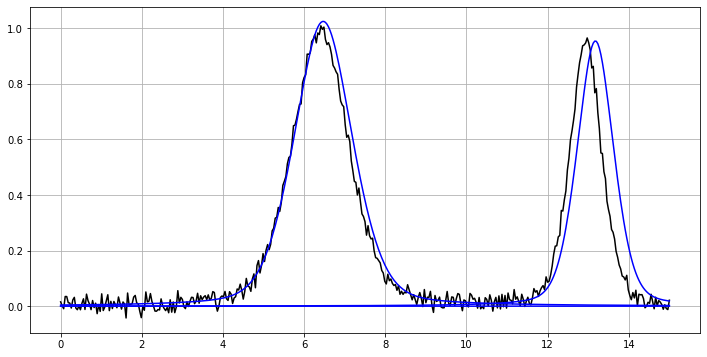

real_center   [ 0.          6.39994478 12.93951819]
predict_center [ 0.030345537 6.4703903 13.177426 ]
---------------
real_width    [0.         1.65652237 0.93438808]
predict_center [ -0.006177604 1.7109488 1.0727451 ]
---------------
real_amp      [0.         0.99348086 0.9478093 ]
predict_center [ -0.017400518 1.0251019 0.9547621 ]


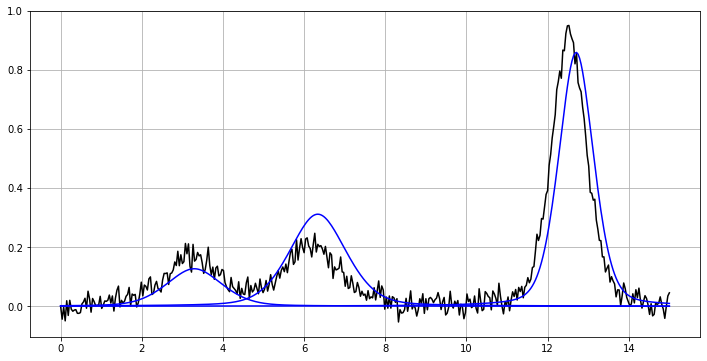

real_center   [ 3.23631434  6.18606995 12.52827948]
predict_center [ 3.29246 6.3371444 12.703523 ]
---------------
real_width    [1.66278035 1.68069287 1.00126402]
predict_center [ 1.6187991 1.6673065 1.0213253 ]
---------------
real_amp      [0.17531519 0.19742663 0.9243484 ]
predict_center [ 0.12689912 0.31158853 0.85925543 ]


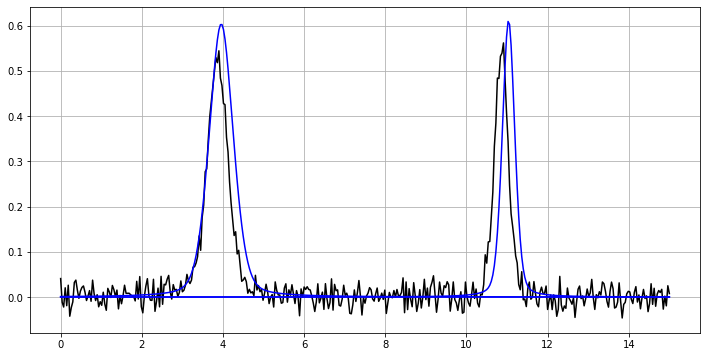

real_center   [ 0.          3.86715569 10.86221601]
predict_center [ 0.066773035 3.957285 11.037874 ]
---------------
real_width    [0.         0.59165533 0.40581259]
predict_center [ 0.0028567761 0.70922977 0.3665635 ]
---------------
real_amp      [0.         0.51955378 0.53934786]
predict_center [ -0.010977492 0.6037563 0.6118552 ]


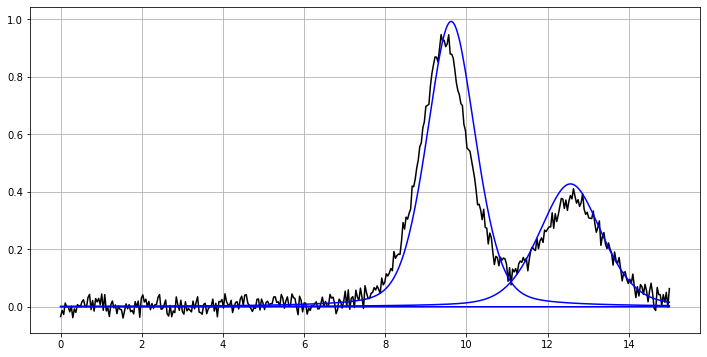

real_center   [ 0.          9.45233636 12.62868582]
predict_center [ -0.014917515 9.622949 12.562281 ]
---------------
real_width    [0.         1.44668865 1.87998592]
predict_center [ -0.002502203 1.4280884 1.8520724 ]
---------------
real_amp      [0.         0.91245941 0.36050666]
predict_center [ -0.0137233585 0.9921355 0.42705652 ]


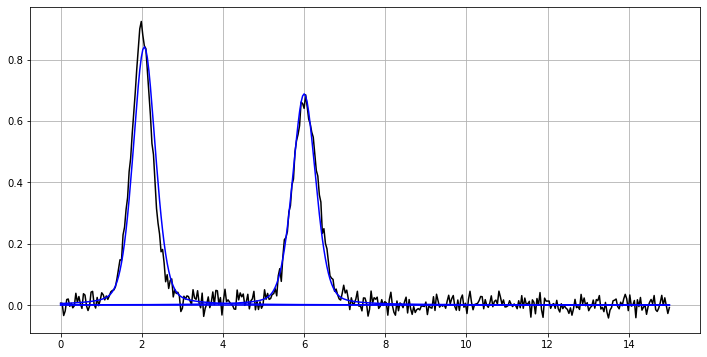

real_center   [0.         2.00332775 6.03248714]
predict_center [ 0.006291367 2.0616581 5.999711 ]
---------------
real_width    [0.         0.59737084 0.7272154 ]
predict_center [ -0.0025545657 0.6585996 0.68286276 ]
---------------
real_amp      [0.         0.90353073 0.66262424]
predict_center [ -0.012503475 0.8414135 0.6881872 ]


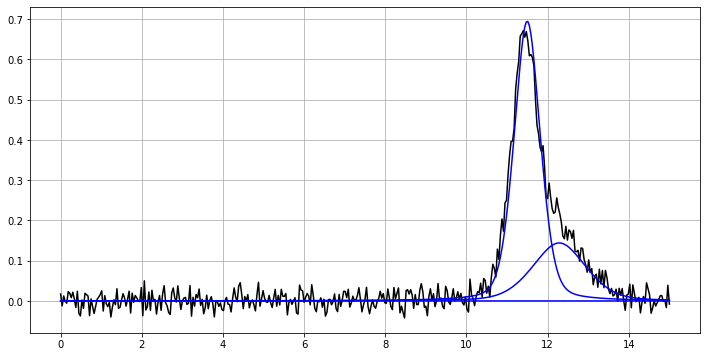

real_center   [ 0.         11.42268043 12.25882526]
predict_center [ -0.011914395 11.497279 12.285227 ]
---------------
real_width    [0.         0.75334379 1.47571775]
predict_center [ -0.0009288788 0.7635132 1.559321 ]
---------------
real_amp      [0.         0.59638167 0.17278906]
predict_center [ -0.013440132 0.69543874 0.1440905 ]


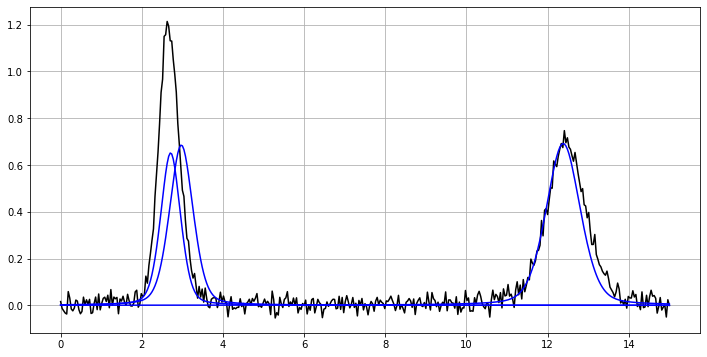

real_center   [ 2.57538501  2.73040878 12.45116549]
predict_center [ 2.7102256 2.973805 12.384502 ]
---------------
real_width    [0.41405293 0.60919744 1.12779081]
predict_center [ 0.5801786 0.69262785 1.0024823 ]
---------------
real_amp      [0.5085511  0.80758984 0.70893355]
predict_center [ 0.65181404 0.6852485 0.691625 ]


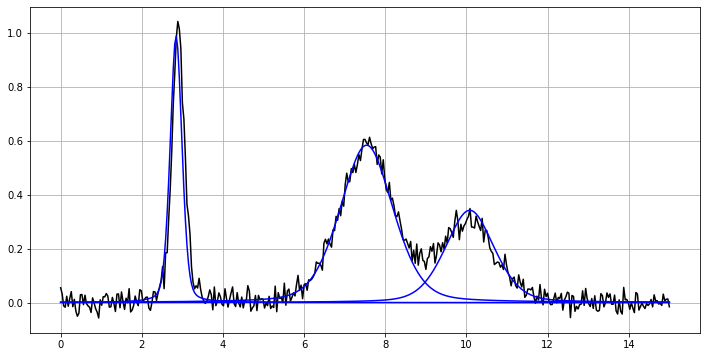

real_center   [ 2.9017155   7.54113871 10.03829508]
predict_center [ 2.845019 7.5387273 10.082176 ]
---------------
real_width    [0.3609779 1.5868491 1.5857514]
predict_center [ 0.34639207 1.5619463 1.4383382 ]
---------------
real_amp      [0.9967733  0.57811673 0.29408781]
predict_center [ 0.9873837 0.58290875 0.34180328 ]


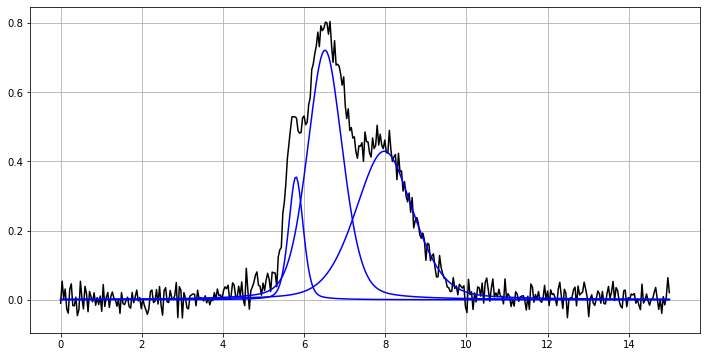

real_center   [5.70187413 6.47325447 7.95269075]
predict_center [ 5.7982016 6.5145254 7.9743624 ]
---------------
real_width    [0.35270478 1.15793397 1.67777024]
predict_center [ 0.42723864 1.0389018 1.6946715 ]
---------------
real_amp      [0.28978847 0.72433166 0.41654231]
predict_center [ 0.35540646 0.72073615 0.42892474 ]


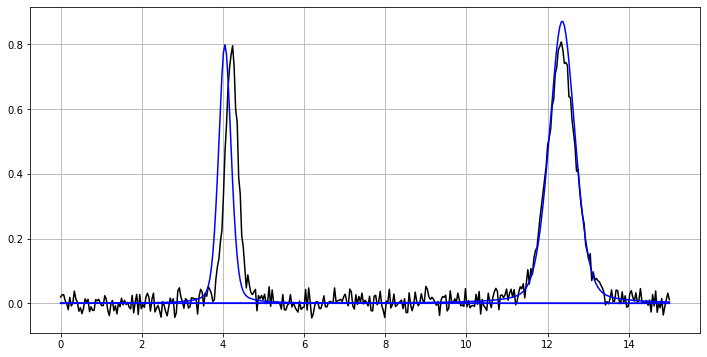

real_center   [ 0.          4.21687094 12.34120659]
predict_center [ 0.017346598 4.047115 12.359106 ]
---------------
real_width    [0.         0.36773928 0.81390437]
predict_center [ 0.008315638 0.36792582 0.75894773 ]
---------------
real_amp      [0.         0.78705796 0.79347587]
predict_center [ -0.013055772 0.79918754 0.87209904 ]


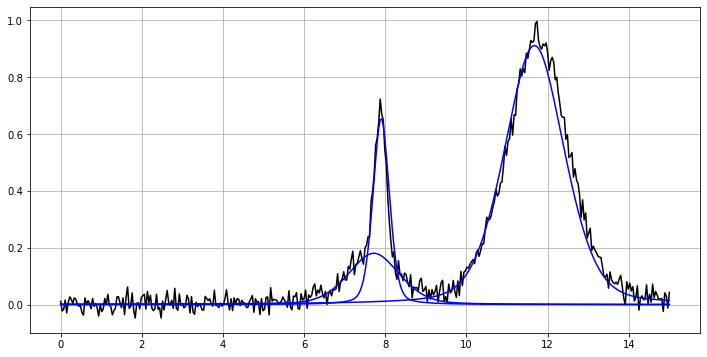

real_center   [ 7.64690374  7.88672447 11.75998207]
predict_center [ 7.7167907 7.8987293 11.674296 ]
---------------
real_width    [1.57721792 0.35065511 1.76987164]
predict_center [ 1.5040529 0.4796505 1.7631761 ]
---------------
real_amp      [0.15874303 0.52349397 0.94926077]
predict_center [ 0.1804963 0.6551438 0.91138256 ]


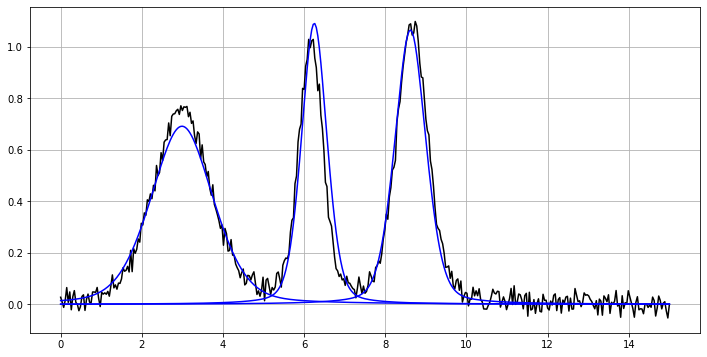

real_center   [2.97550177 6.17211837 8.66438667]
predict_center [ 2.9907675 6.2498636 8.618511 ]
---------------
real_width    [1.63453699 0.70265382 0.91474209]
predict_center [ 1.8348646 0.74847496 0.91541743 ]
---------------
real_amp      [0.76022675 1.01366238 1.09569614]
predict_center [ 0.69147605 1.091081 1.0648971 ]


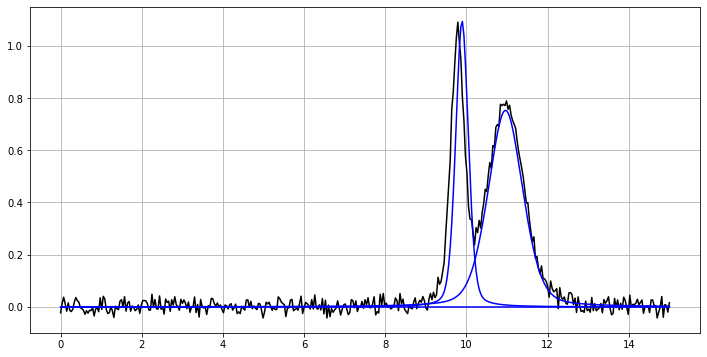

real_center   [ 0.          9.77946893 10.97017916]
predict_center [ -0.049605273 9.891238 10.962217 ]
---------------
real_width    [0.         0.39829634 1.05510464]
predict_center [ 0.0010726154 0.37249732 1.0152271 ]
---------------
real_amp      [0.         1.01298834 0.78358955]
predict_center [ -0.018447965 1.0947914 0.7526206 ]


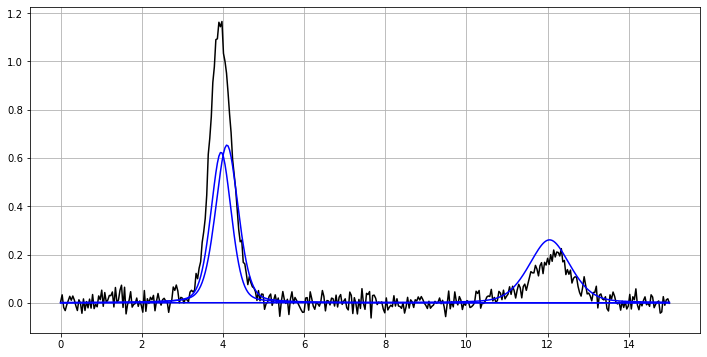

real_center   [ 3.8569353   4.12070216 12.11402843]
predict_center [ 3.9534857 4.097992 12.048033 ]
---------------
real_width    [0.4981711  0.58429175 1.10961953]
predict_center [ 0.60379475 0.6647303 1.211534 ]
---------------
real_amp      [0.83741193 0.49685655 0.19540706]
predict_center [ 0.6236422 0.65336066 0.26078904 ]


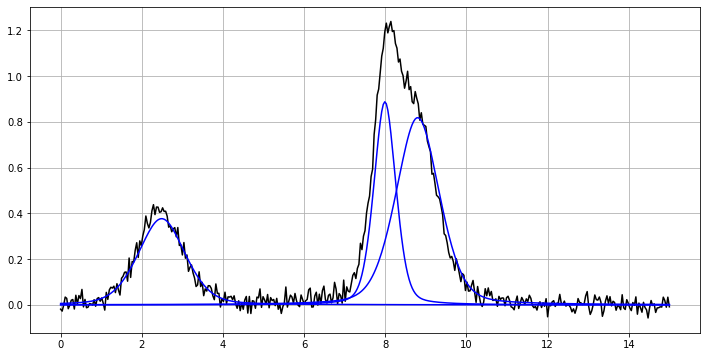

real_center   [2.4287244  8.00130851 8.73111697]
predict_center [ 2.4889536 7.990223 8.79739 ]
---------------
real_width    [1.30205305 0.73029477 1.26629847]
predict_center [ 1.3791907 0.6431099 1.278092 ]
---------------
real_amp      [0.414536   0.85436318 0.82462015]
predict_center [ 0.37688908 0.8874191 0.81807876 ]


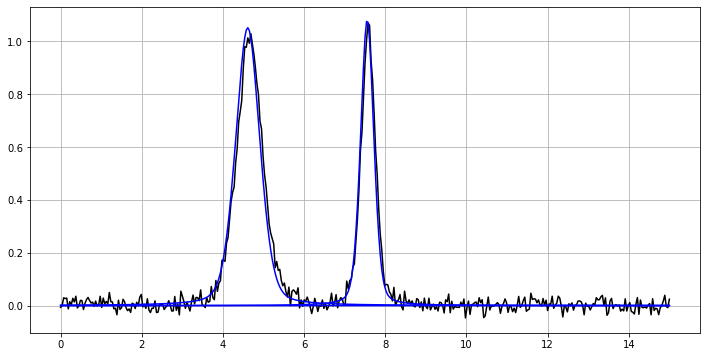

real_center   [0.         4.6604788  7.58096173]
predict_center [ -0.005629204 4.6103697 7.5544972 ]
---------------
real_width    [0.         0.74087437 0.40953535]
predict_center [ -0.0011912286 0.71187913 0.38687932 ]
---------------
real_amp      [0.         1.0195198  1.04926695]
predict_center [ -0.01663892 1.0520164 1.0826604 ]


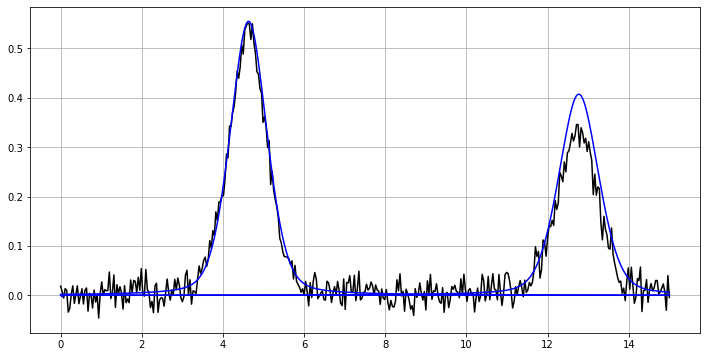

real_center   [ 0.          4.61549707 12.73793585]
predict_center [ 0.04460094 4.630761 12.768079 ]
---------------
real_width    [0.         1.11693444 1.17194019]
predict_center [ 0.009856731 1.0805479 1.1771553 ]
---------------
real_amp      [0.         0.53062024 0.33579517]
predict_center [ -0.010181665 0.5550264 0.40734303 ]


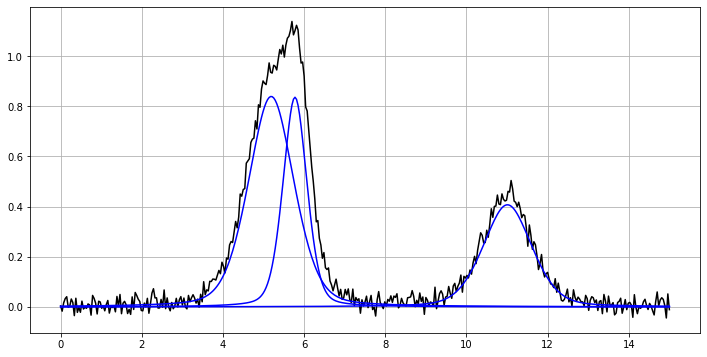

real_center   [ 5.12023748  5.84530511 10.99748078]
predict_center [ 5.1891546 5.774341 11.009814 ]
---------------
real_width    [1.34057725 0.74437628 1.38113455]
predict_center [ 1.3392636 0.70112586 1.4318893 ]
---------------
real_amp      [0.84935913 0.70472954 0.46106577]
predict_center [ 0.8390264 0.8358152 0.40716916 ]


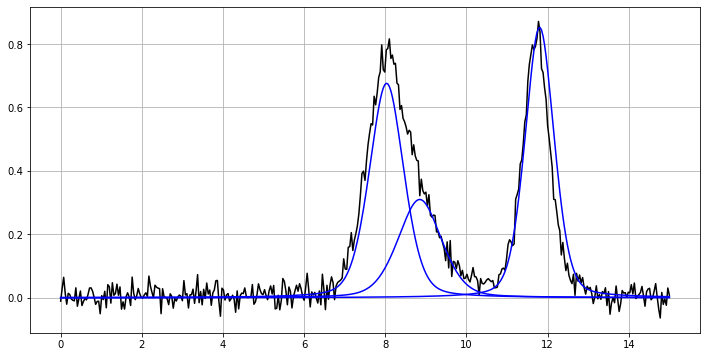

real_center   [ 8.0085005   8.9801749  11.72798113]
predict_center [ 8.032521 8.84806 11.803379 ]
---------------
real_width    [1.09531881 1.22843115 0.76551006]
predict_center [ 1.0114627 1.2769421 0.85271883 ]
---------------
real_amp      [0.71929417 0.23130514 0.83006498]
predict_center [ 0.6760704 0.30983326 0.8525387 ]


In [21]:
for i in range(30,50):

    plt.figure(figsize=(12,6))
    plt.plot(x,test_graph[i] ,color='black')
    plt.plot(x,y(prediction[1][i][0],prediction[2][i][0],prediction[3][i][0],x),color = 'blue')
    plt.plot(x,y(prediction[1][i][1],prediction[2][i][1],prediction[3][i][1],x),color = 'blue')
    plt.plot(x,y(prediction[1][i][2],prediction[2][i][2],prediction[3][i][2],x),color = 'blue')
    plt.grid(True)
    plt.show()
    print('real_center  ',test_center[i])
    print('predict_center','[',prediction[1][i][0],prediction[1][i][1],prediction[1][i][2],']')
    print('---------------')
    print('real_width   ',test_width[i])
    print('predict_center','[',prediction[2][i][0],prediction[2][i][1],prediction[2][i][2],']')
    print('---------------')
    print('real_amp     ',test_amp[i])
    print('predict_center','[',prediction[3][i][0],prediction[3][i][1],prediction[3][i][2],']')
    
    

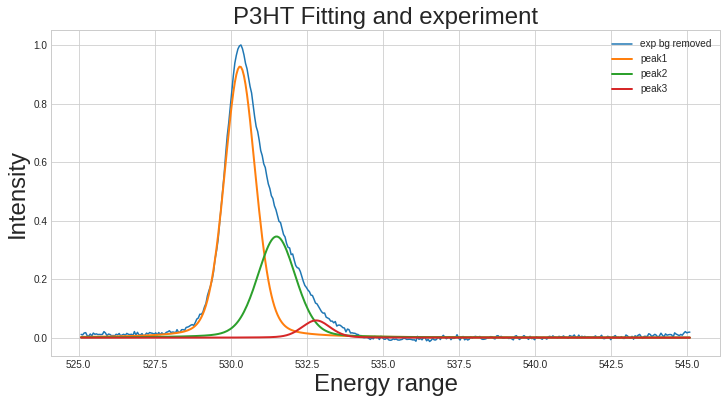

In [22]:
plt.style.use(["seaborn-whitegrid"])
plt.figure(figsize = (12, 6))

# only three peaks
bg = np.loadtxt("ITO_O1s_bg.txt")
exp = np.loadtxt("ITO_O1s_exp.txt")
fitting = np.loadtxt("ITO_O1s_fitting.txt")
peak1 = np.loadtxt("ITO_O1s_p1.txt")
peak2 = np.loadtxt("ITO_O1s_p2.txt")
peak3 = np.loadtxt("ITO_O1s_p3.txt")

# 테스트하고자 하는 실제 XPS 데이터의 parameter 범위가 너무 크므로 
# 네트워크 자체는 작은 규모의 파라미터 범위에서 학습시키고,
# 테스트할 경우, 범위를 줄인 xps 데이터를 불러와서 테스트해본다..

# exp data에서 background를 제거하고, peak 높이를 1로 normalize한다.
plt.plot(exp[:, 0], (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")

#plt.plot(fitting[:, 0], fitting[:, 1] - bg[:, 1], label = "fitting", linewidth = 2)

# 마찬가지로 개별 peak도 크기를 줄인다.
plt.plot(peak1[:, 0], (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2)
plt.plot(peak2[:, 0], (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2)
plt.plot(peak3[:, 0], (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = 'peak3', linewidth = 2)

plt.grid(True)
plt.title("P3HT Fitting and experiment", size = 24)
plt.xlabel("Energy range", size = 24)
plt.ylabel("Intensity", size = 24)
plt.legend()
plt.show()

(1, 401, 1)


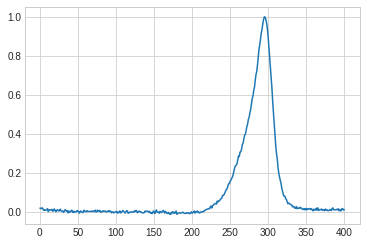

In [23]:
# normalize된 그래프의 y값

test_result = ((exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max())).reshape((1, 401, 1))
print(test_result.shape)
plt.plot(test_result[0])

In [24]:
predict = model.predict(test_result)
print(predict)

[array([[1.9911251]], dtype=float32), array([[-0.36544135, 10.147016  , 10.418185  ]], dtype=float32), array([[0.04487246, 1.4792902 , 0.7921196 ]], dtype=float32), array([[0.04723883, 0.3808443 , 0.8346846 ]], dtype=float32)]


In [25]:
new_predict = []

for element in predict:
    new_predict.append(element.reshape((element.shape[1])))

In [26]:
print(new_predict[0].shape)  # num_peak
print(new_predict[1].shape)  # center
print(new_predict[2].shape)  # width
print(new_predict[3].shape)  # amp

(1,)
(3,)
(3,)
(3,)


In [27]:
peak_1 = [new_predict[1][0], new_predict[2][0], new_predict[3][0]]
peak_2 = [new_predict[1][1], new_predict[2][1], new_predict[3][1]]
peak_3 = [new_predict[1][2], new_predict[2][2], new_predict[3][2]]

Text(0.5, 1.0, 'Network fitting vs real XPS graph')

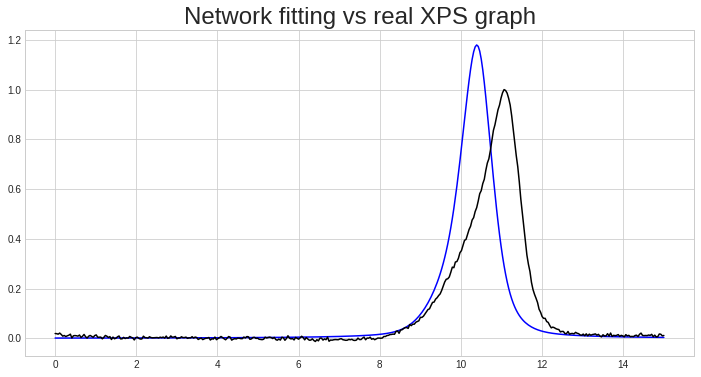

In [28]:
plt.figure(figsize = (12,6))
plt.plot(x,y(new_predict[1][0],new_predict[2][0],new_predict[3][0],x)+
         y(new_predict[1][1],new_predict[2][1],new_predict[3][1],x)+
         y(new_predict[1][2],new_predict[2][2],new_predict[3][2],x),color = 'blue')
# plt.plot(x,y(new_predict[1][1],new_predict[2][1],new_predict[3][1],x),color = 'blue')
# plt.plot(x,y(new_predict[1][2],new_predict[2][2],new_predict[3][2],x),color='blue')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed",color='black')
plt.title("Network fitting vs real XPS graph", size = 24)

Text(0.5, 1.0, 'Predict_peak1 vs Xps_peak1')

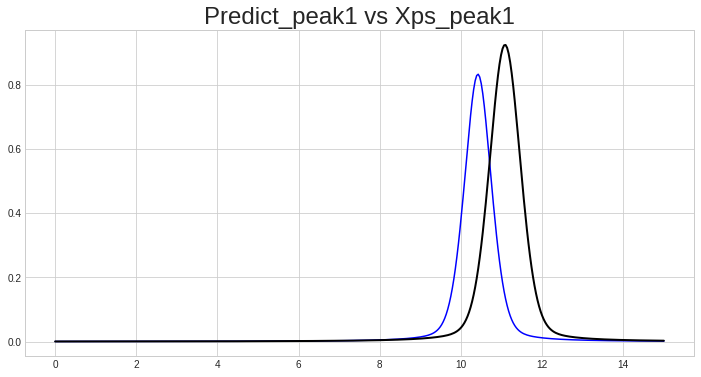

In [29]:
plt.figure(figsize = (12,6))
plt.plot(x,y(new_predict[1][2],new_predict[2][2],new_predict[3][2],x),color='blue')
plt.plot(x, (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2, color='black')
plt.title("Predict_peak1 vs Xps_peak1", size = 24)

Text(0.5, 1.0, 'Pre_peak2 vs Xps_peak2')

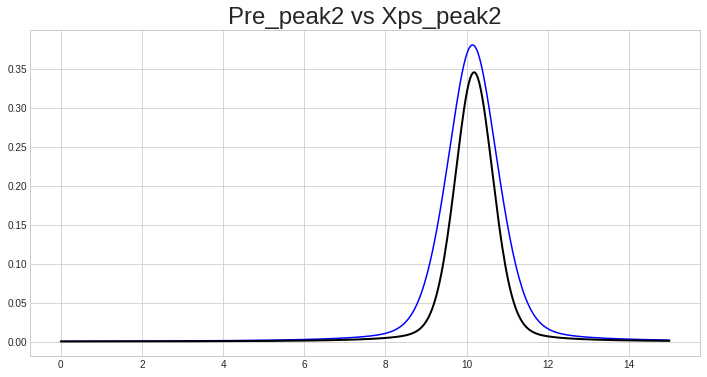

In [30]:
plt.figure(figsize = (12,6))
plt.plot(x,y(new_predict[1][1],new_predict[2][1],new_predict[3][1],x),color='blue')
plt.plot(x, (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()),color = 'black', label = "peak2", linewidth = 2)
plt.title("Pre_peak2 vs Xps_peak2", size = 24)

Text(0.5, 1.0, 'Pre_peak3 vs Xps_peak3')

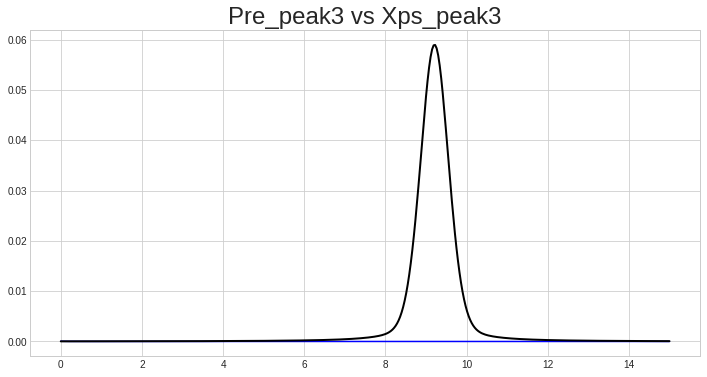

In [31]:
plt.figure(figsize = (12,6))
plt.plot(x,y(new_predict[1][0],new_predict[2][0],new_predict[3][0],x),color='blue')
plt.plot(x, (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = 'peak3',color = 'black', linewidth = 2)
plt.title("Pre_peak3 vs Xps_peak3", size = 24)

In [32]:
new_predict[1][0],new_predict[2][0],new_predict[3][0]

(-0.36544135, 0.044872455, 0.047238827)

In [33]:
new_predict[0][0]

1.9911251

In [34]:
# only two peak
bg = np.loadtxt("P3HT_S2p_bg.txt")
exp = np.loadtxt("P3HT_S2p_exp.txt")
fitting = np.loadtxt("P3HT_S2p_fitting.txt")
peak1 = np.loadtxt("P3HT_S2p_p1.txt")
peak2 = np.loadtxt("P3HT_S2p_p2.txt")

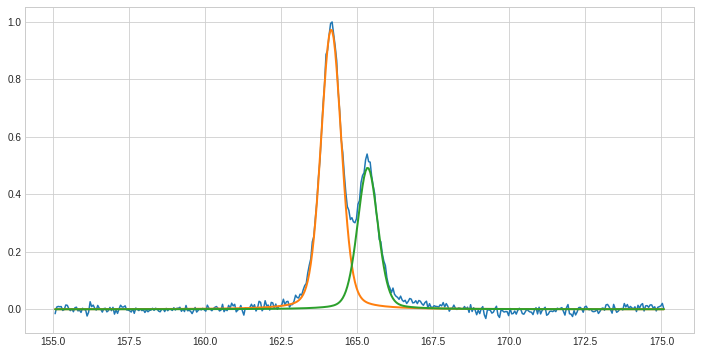

In [35]:
plt.figure(figsize = (12, 6))

# exp data에서 background를 제거하고, peak 높이를 1로 normalize한다.
plt.plot(exp[:, 0], (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")

# 마찬가지로 개별 peak도 크기를 줄인다.
plt.plot(peak1[:, 0], (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2)
plt.plot(peak2[:, 0], (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2)

In [36]:
# normalize된 그래프의 y값
test_result = ((exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max())).reshape((1, 401, 1))
print(test_result.shape)

(1, 401, 1)


In [37]:
predict = model.predict(test_result)
print(predict)

[array([[1.9911251]], dtype=float32), array([[-0.6268607,  7.245941 ,  7.9913154]], dtype=float32), array([[-0.03028929,  0.6135433 ,  0.48369443]], dtype=float32), array([[0.04125476, 0.4351266 , 0.9480335 ]], dtype=float32)]


In [38]:
new_predict = []

for element in predict:
    new_predict.append(element.reshape((element.shape[1])))

In [39]:
print(new_predict[0].shape)  #number_peak
print(new_predict[1].shape)  # center
print(new_predict[2].shape)  # width
print(new_predict[3].shape)  # amp

(1,)
(3,)
(3,)
(3,)


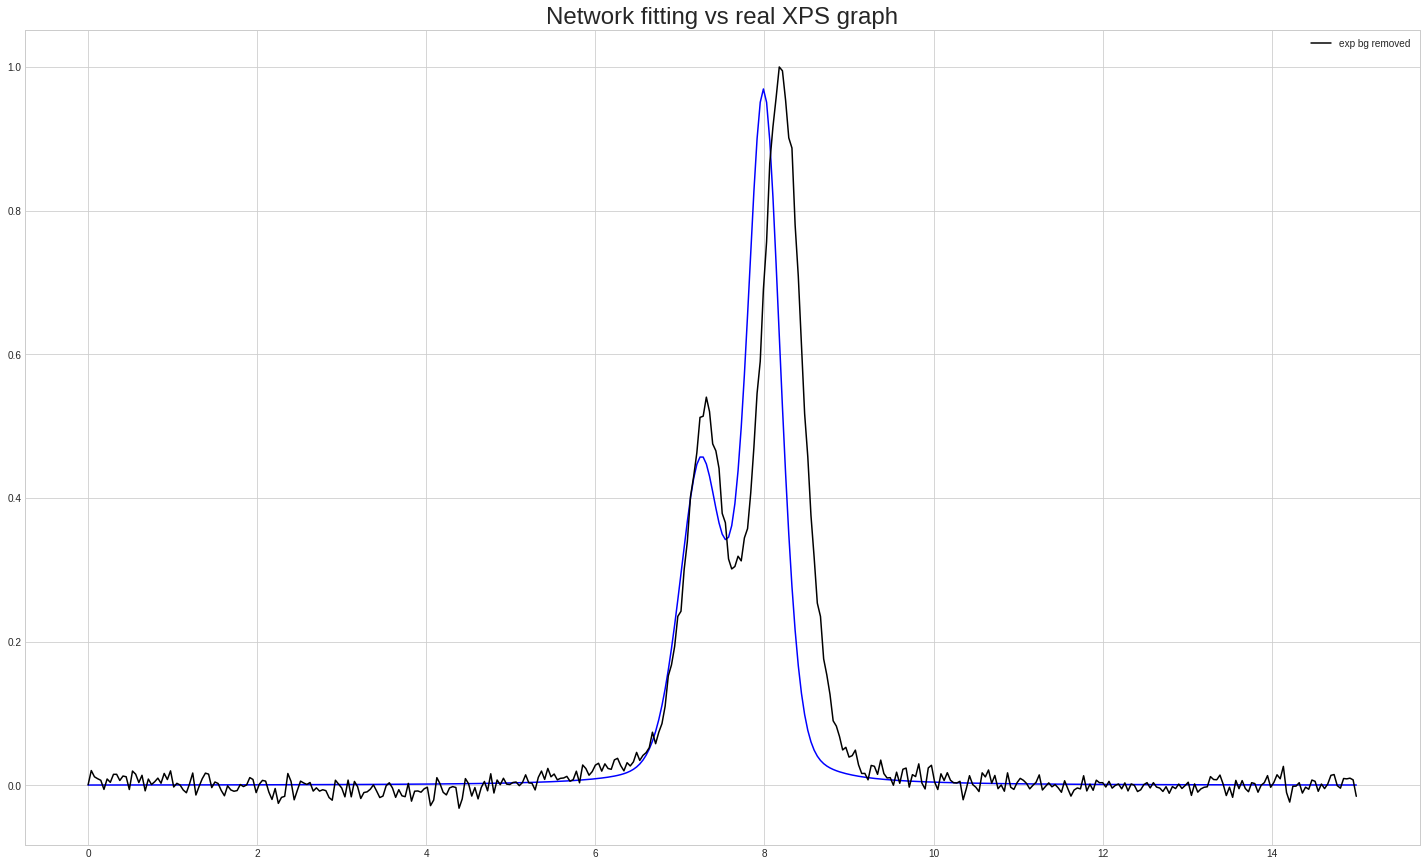

In [40]:
plt.figure(figsize = (25,15))
plt.plot(x,y(new_predict[1][0],new_predict[2][0],new_predict[3][0],x)+
         y(new_predict[1][1],new_predict[2][1],new_predict[3][1],x)+
         y(new_predict[1][2],new_predict[2][2],new_predict[3][2],x),color = 'blue')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()),color = 'black', label = "exp bg removed")
plt.title("Network fitting vs real XPS graph", size = 24)
plt.legend()

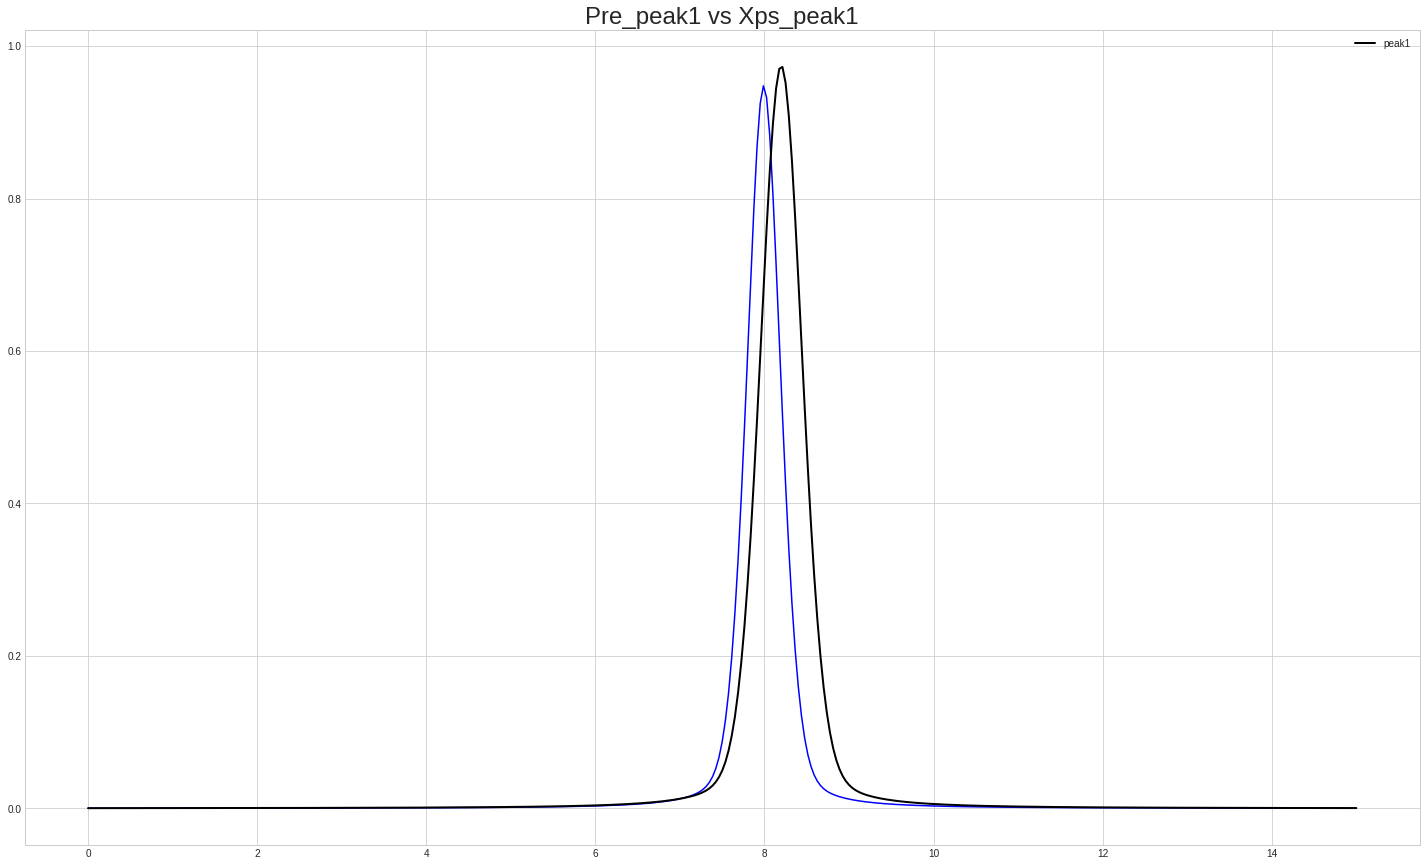

In [41]:
plt.figure(figsize = (25,15))
plt.plot(x,y(new_predict[1][2],new_predict[2][2],new_predict[3][2],x),color = 'blue')
plt.plot(x, (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()),color='black', label = "peak1", linewidth = 2)
plt.title("Pre_peak1 vs Xps_peak1", size = 24)
plt.legend()

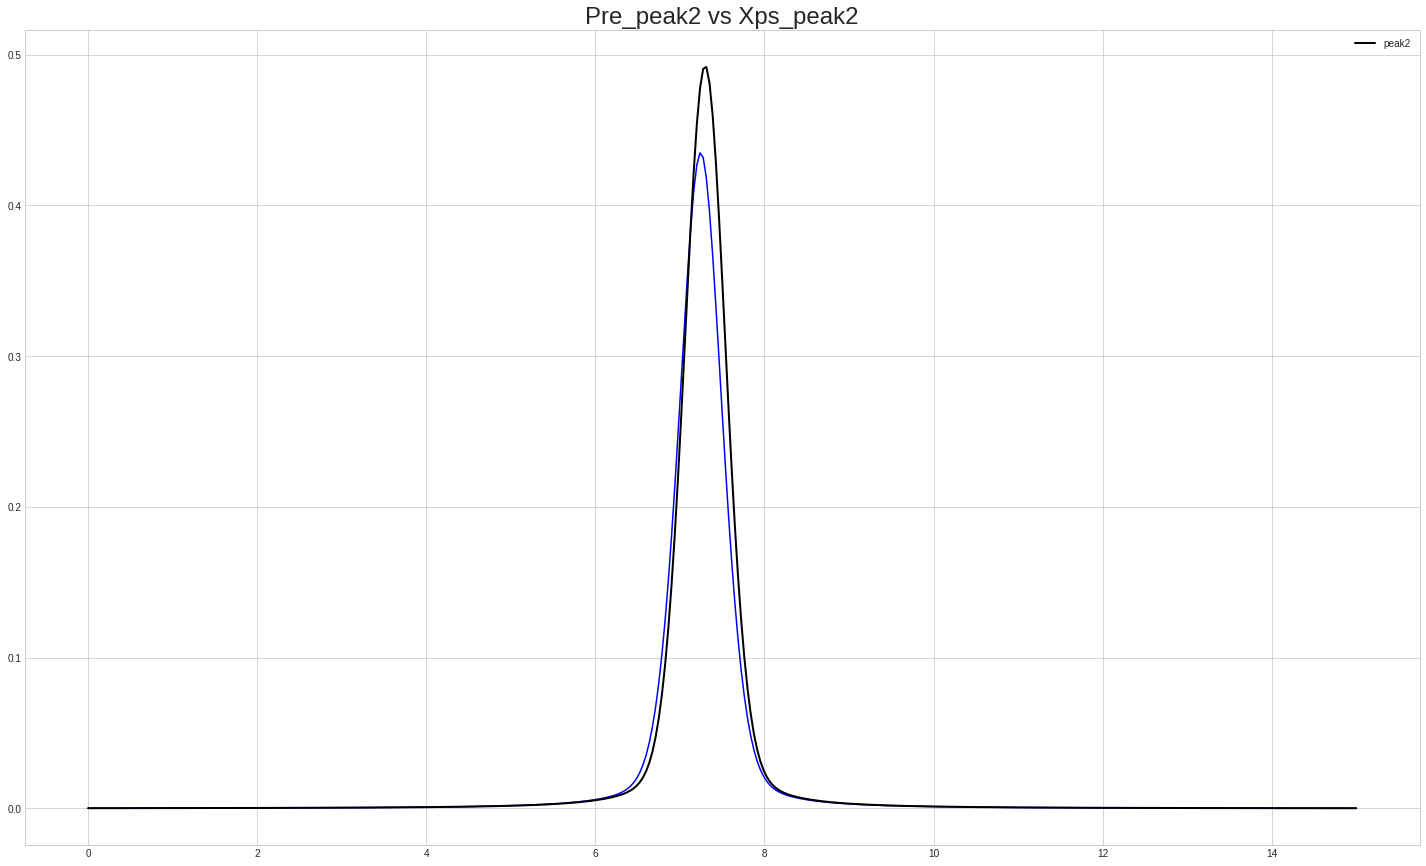

In [42]:
plt.figure(figsize = (25,15))
plt.plot(x,y(new_predict[1][1],new_predict[2][1],new_predict[3][1],x),color = 'blue')
plt.plot(x, (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()),color='black', label = "peak2", linewidth = 2)
plt.title("Pre_peak2 vs Xps_peak2", size = 24)
plt.legend()

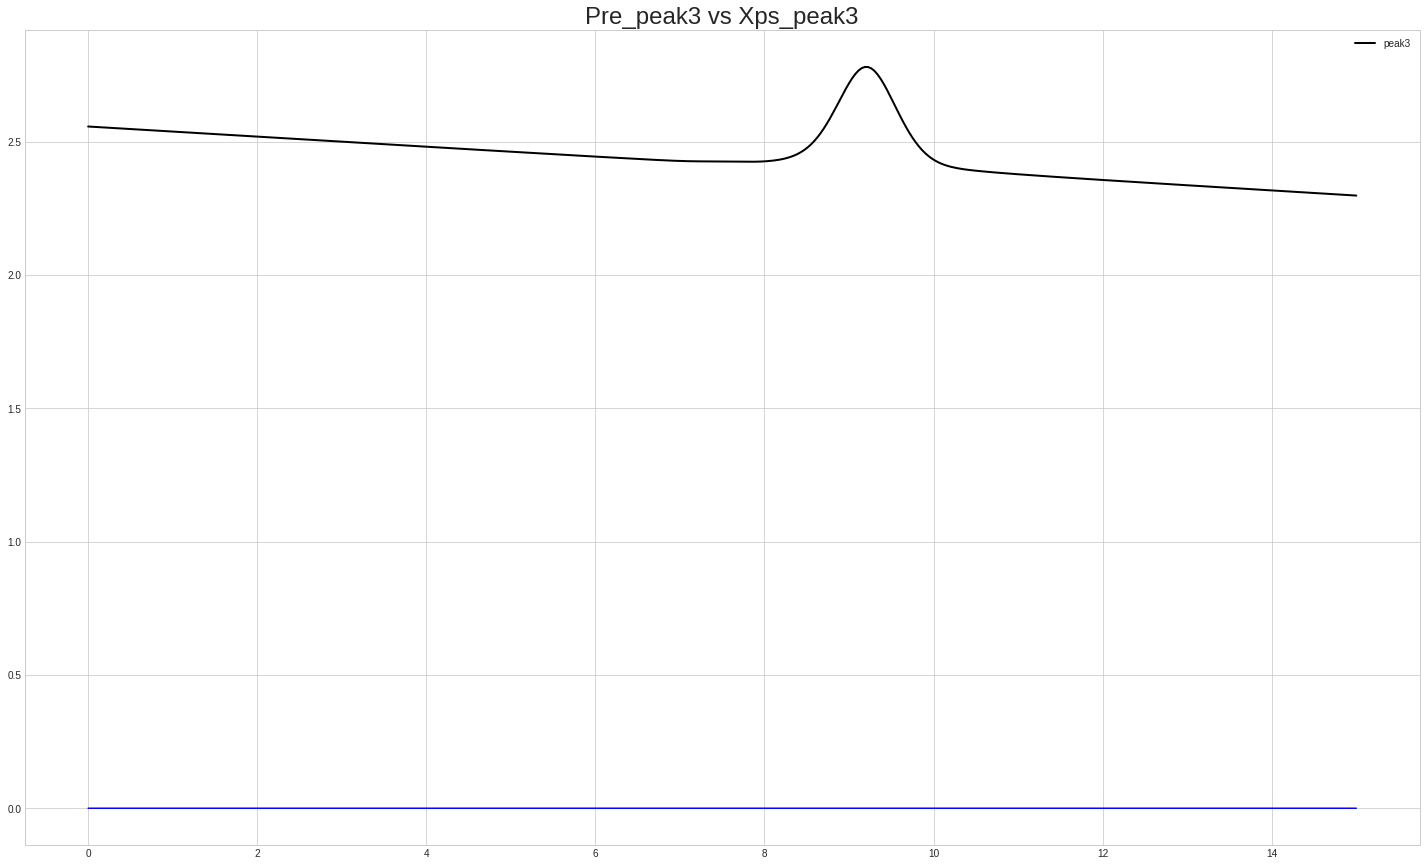

In [43]:
plt.figure(figsize = (25,15))
plt.plot(x,y(new_predict[1][0],new_predict[2][0],new_predict[3][0],x),color = 'blue')
plt.plot(x, (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()),color='black', label = 'peak3', linewidth = 2)
plt.title("Pre_peak3 vs Xps_peak3", size = 24)
plt.legend()

In [44]:
error_center_total=0
for i in range(test_center.shape[0]):
    error_center_total = error_center_total + (abs(prediction[1][i]-test_center[i]))
print('error_center_total = ',error_center_total)
error_center = error_center_total/test_center.shape[0]
print('error_center =  ',error_center)
print('\n')

error_width_total=0
for i in range(test_width.shape[0]):
    error_width_total = error_width_total + (abs(prediction[2][i]-test_width[i]))
print('error_width_total = ',error_width_total)
error_width = error_width_total/test_width.shape[0]
print('error_width =  ',error_width)
print('\n')

error_amp_total=0
for i in range(test_amp.shape[0]):
    error_amp_total = error_amp_total + (abs(prediction[3][i]-test_amp[i]))
print('error_amp_total = ',error_amp_total)
error_amp = error_amp_total/test_amp.shape[0]
print('error_amp =  ',error_amp)
print('\n')

error_peak_number_total=0
for i in range(test_peak_number.shape[0]):
    error_peak_number_total = error_peak_number_total + (abs(prediction[0][i]-test_peak_number[i]))
print('error_peak_number_total = ',error_peak_number_total)
error_peak_number = error_peak_number_total/test_peak_number.shape[0]
print('error_peak_number =  ',error_peak_number)
print('\n')


error_center_total =  [2183.8576086  2784.79905473 1595.74586486]
error_center =   [0.10919288 0.13923995 0.07978729]


error_width_total =  [1000.69451219 1562.24149583 1282.48514755]
error_width =   [0.05003473 0.07811207 0.06412426]


error_amp_total =  [ 814.15919816 1433.37488684 1135.49303873]
error_amp =   [0.04070796 0.07166874 0.05677465]


error_peak_number_total =  [327.4589]
error_peak_number =   [0.01637295]




In [45]:
#수정한거

#model7에다 교수님 conv1d층 따옴
# 크게 별반 차이가 없었다.. -> peak_number만..?0.003(model7)->0.01(model12)로 오차 증가
# 학습시간은 이게 더 빠르네
# 큰 차이가 없다면 내걸로 해도 되겠구만..ㅋㅋ..

In [ ]:
#현재

# 7model에 교수님 conv1d를 get함->
# 독창성을 가져가고 싶다면 7model 쓰고 
# 시간 아끼고 싶다면 12model 쓰고

In [ ]:
#확인할거
# 데이터 비율을 다시..?
# 이제 새 대이터로 해보자
# 교수님 model와 비교